# Machine Learning Modeling

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.inspection import permutation_importance

In [3]:
X_train = pd.read_csv('preprocessed_X_train.csv')
y_train = pd.read_csv('preprocessed_y_train.csv')
X_test = pd.read_csv('preprocessed_X_test.csv')
y_test = pd.read_csv('preprocessed_y_test.csv')

## Models

In [13]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
}

## Hyperparameter Grids

In [10]:
param_grids = {
    "Logistic Regression": {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1],
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 2]
    },
    "KNN": {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

}

## Modeling and Evaluation

In [14]:
evaluation_metrics = {}

for name, model in models.items():
    
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predictions on test data
    y_test_pred = model.predict(X_test)
    # Predictions on training data
    y_train_pred = model.predict(X_train)
    
    # Test set metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Training set metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    evaluation_metrics[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    }
    
    print(f"📊 {name}")
    print(f"  🟢 Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    print(f"  🔵 Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}\n")

c:\Users\fizuf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fizuf\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Logistic Regression
  🟢 Train - Accuracy: 0.6623, Precision: 0.6674, Recall: 0.6472, F1 Score: 0.6572
  🔵 Test  - Accuracy: 0.6711, Precision: 0.1365, Recall: 0.5651, F1 Score: 0.2199

📊 Decision Tree
  🟢 Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
  🔵 Test  - Accuracy: 0.8121, Precision: 0.1150, Recall: 0.1929, F1 Score: 0.1441



c:\Users\fizuf\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📊 KNN
  🟢 Train - Accuracy: 0.8786, Precision: 0.8228, Recall: 0.9649, F1 Score: 0.8882
  🔵 Test  - Accuracy: 0.6886, Precision: 0.1064, Recall: 0.3778, F1 Score: 0.1660



In [16]:
evaluation_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

evaluation_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
Logistic Regression,0.662333,0.671073,0.667387,0.136503,0.647237,0.565114,0.657158,0.219891
Decision Tree,1.000000,0.812065,1.000000,0.115025,1.000000,0.192864,1.000000,0.144105
KNN,0.878596,0.688569,0.822849,0.106362,0.964932,0.377800,0.888245,0.165992


## Feature Importance

In [24]:
feature_importance_results = {}

for name, model in models.items():
    print(f"🔍 Extracting feature importance for {name}")
    
    if hasattr(model, 'feature_importances_'):  # Tree-based models
        importance = model.feature_importances_
        feature_importance_results[name] = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
    
    elif hasattr(model, 'coef_'):  # Logistic Regression
        importance = model.coef_[0]  # For binary classification
        feature_importance_results[name] = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
    
    else:  # Models without built-in importance
        print(f"⚠️ {name} does not have built-in feature importance.")

🔍 Extracting feature importance for Logistic Regression
🔍 Extracting feature importance for Decision Tree
🔍 Extracting feature importance for KNN
⚠️ KNN does not have built-in feature importance.


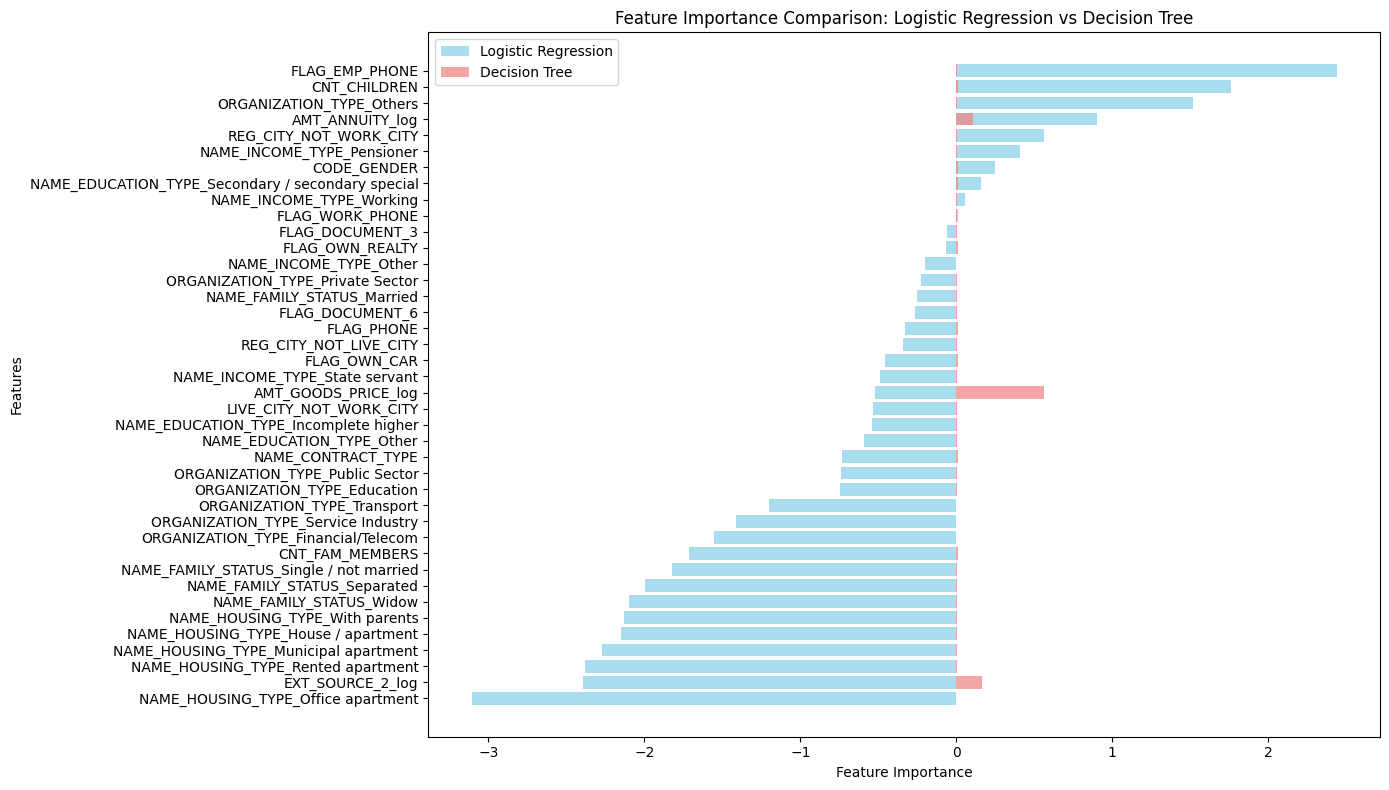

In [25]:
combined_importance = pd.DataFrame()

for name, importance_df in feature_importance_results.items():
    importance_df['Model'] = name
    combined_importance = pd.concat([combined_importance, importance_df])

# Plot combined feature importance
plt.figure(figsize=(14, 8))

# Define pastel colors for each model
model_colors = {
    'Logistic Regression': 'skyblue',
    'Decision Tree': 'lightcoral'
}

for model, color in model_colors.items():
    subset = combined_importance[combined_importance['Model'] == model]
    plt.barh(
        subset['Feature'], 
        subset['Importance'], 
        label=model, 
        color=color, 
        alpha=0.7
    )

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison: Logistic Regression vs Decision Tree')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()